In [7]:
!pip install fake_useragent

In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import ElementNotInteractableException
import time
import csv

# Chrome 옵션 설정
options = Options()
options.add_argument("start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")
driver = webdriver.Chrome(options=options)

try:
    # 네이버 뉴스 메인 페이지 접속
    driver.get("https://news.naver.com/")
    time.sleep(2)
    
    # 팝업 닫기 시도 (존재할 경우)
    try:
        close_btn = driver.find_element(By.CSS_SELECTOR, "button._gnb_header_btn_close")
        if close_btn.is_displayed():
            close_btn.click()
            time.sleep(1)
    except:
        pass
    
    # 검색창 안정적으로 찾기
    search_box = WebDriverWait(driver, 15).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "input[type='search']"))
    )
    
    # 검색어 입력 (상호작용 문제 해결)
    try:
        search_box.send_keys("퇴직연금")
        search_box.send_keys(Keys.RETURN)
    except ElementNotInteractableException:
        # JavaScript로 대체 입력
        driver.execute_script("arguments[0].value = '퇴직연금';", search_box)
        driver.execute_script("arguments[0].dispatchEvent(new KeyboardEvent('keydown', {'key': 'Enter'}));", search_box)
    
    time.sleep(2)
    
    # 뉴스 탭 클릭 (검색 결과가 뉴스 섹션에 표시되도록)
    news_tab = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "a[data-clk*='news']"))
    )
    news_tab.click()
    time.sleep(2)
    
    # 스크롤 10회 수행
    for _ in range(10):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1.5)
    
    # CSV 파일 생성
    with open('retirement_pension_news.csv', 'w', encoding='utf-8-sig', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['제목', '내용', '링크'])
        
        # 뉴스 아이템 수집
        news_items = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".news_wrap"))
        )
        
        for item in news_items:
            try:
                # 제목 추출 (사용자 제공 CSS 선택자 사용)
                title = item.find_element(
                    By.CSS_SELECTOR, 
                    'a.BHYkUbEQ2afEbTC7LXoA.tQzTN_dJmfJcpqVyJEAz > span'
                ).text
                
                # 내용 추출 (사용자 제공 CSS 선택자 사용)
                content = item.find_element(
                    By.CSS_SELECTOR, 
                    'a.BHYkUbEQ2afEbTC7LXoA.Ba1Kt4dKXms6CvCOZyFl > span'
                ).text
                
                # 링크 추출
                link = item.find_element(By.CSS_SELECTOR, 'a.news_tit').get_attribute('href')
                
                # CSV 저장
                writer.writerow([title, content, link])
                print(f"저장 완료: {title[:20]}...")
                
            except Exception as e:
                print(f"아이템 처리 오류: {str(e)}")
    
    print("크롤링 완료! retirement_pension_news.csv 파일 확인")

finally:
    driver.quit()


TimeoutException: Message: 


In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# Chrome 옵션 설정
options = Options()
options.add_argument("start-maximized")
options.add_argument("--disable-blink-features=AutomationControlled")
driver = webdriver.Chrome(options=options)

try:
    # 네이버 뉴스 검색 페이지 직접 접속 (검색어 포함)
    search_url = "https://search.naver.com/search.naver?where=news&query=퇴직연금"
    driver.get(search_url)
    time.sleep(2)
    
    # 뉴스 탭이 이미 선택된 상태이므로 추가 클릭 불필요
    print("뉴스 검색 페이지 직접 로드 완료")
    
    # 스크롤 10회 수행
    for i in range(10):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print(f"스크롤 {i+1}/10 수행")
        time.sleep(1.5)
    
    # CSV 파일 생성
    with open('retirement_pension_news.csv', 'w', encoding='utf-8-sig', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['제목', '내용', '링크'])
        
        # 뉴스 아이템 수집
        news_items = WebDriverWait(driver, 15).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".news_wrap"))
        )
        print(f"발견된 뉴스 아이템: {len(news_items)}개")
        
        for item in news_items:
            try:
                # 제목 추출 (사용자 제공 CSS 선택자 사용)
                title = item.find_element(
                    By.CSS_SELECTOR, 
                    'a.BHYkUbEQ2afEbTC7LXoA.tQzTN_dJmfJcpqVyJEAz > span'
                ).text
                
                # 내용 추출 (사용자 제공 CSS 선택자 사용)
                content = item.find_element(
                    By.CSS_SELECTOR, 
                    'a.BHYkUbEQ2afEbTC7LXoA.Ba1Kt4dKXms6CvCOZyFl > span'
                ).text
                
                # 링크 추출
                link = item.find_element(By.CSS_SELECTOR, 'a.news_tit').get_attribute('href')
                
                # CSV 저장
                writer.writerow([title, content, link])
                print(f"저장 완료: {title[:20]}...")
                
            except Exception as e:
                print(f"아이템 처리 오류: {str(e)}")
    
    print("크롤링 완료! retirement_pension_news.csv 파일 확인")

finally:
    driver.quit()


뉴스 검색 페이지 직접 로드 완료
스크롤 1/10 수행
스크롤 2/10 수행
스크롤 3/10 수행
스크롤 4/10 수행
스크롤 5/10 수행
스크롤 6/10 수행
스크롤 7/10 수행
스크롤 8/10 수행
스크롤 9/10 수행
스크롤 10/10 수행


TimeoutException: Message: 


In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# ==========================
# 1️⃣ Chrome 옵션 설정
# ==========================
options = Options()
options.add_argument("start-maximized")  # 브라우저 전체화면
options.add_argument("--disable-blink-features=AutomationControlled")  # 자동화 문구 제거
driver = webdriver.Chrome(options=options)

try:
    # ==========================
    # 2️⃣ 네이버 뉴스 페이지 접속
# ==========================
    search_url = "https://search.naver.com/search.naver?where=news&query=퇴직연금"
    driver.get(search_url)
    print("✅ 뉴스 검색 페이지 로드 완료")
    time.sleep(2)

    # ==========================
    # 3️⃣ 로딩 대기
    # 변경된 부분: a.news_tit 로 변경
    # ==========================
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "a.news_tit"))
    )
    print("✅ 뉴스 아이템 로드 확인")

    # ==========================
    # 4️⃣ 스크롤 10회 수행
    # ==========================
    for i in range(10):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print(f"▶️ 스크롤 {i + 1}/10 수행...")
        time.sleep(1.5)

    # ==========================
    # 5️⃣ 뉴스 아이템 추출
    # ==========================
    news_items = driver.find_elements(By.CSS_SELECTOR, "div.news_area")
    if not news_items:
        # 변경된 마크업일 경우 다른 방법으로 추출
        news_items = driver.find_elements(By.CSS_SELECTOR, "div.sc_new")
    print(f"🔍 발견된 뉴스 아이템 수: {len(news_items)}개")

    # ==========================
    # 6️⃣ CSV 저장
    # ==========================
    with open('retirement_pension_news.csv', 'w', encoding='utf-8-sig', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['제목', '내용', '링크'])
        for item in news_items:
            try:
                title = item.find_element(By.CSS_SELECTOR, "a.news_tit").text
                link = item.find_element(By.CSS_SELECTOR, "a.news_tit").get_attribute('href')
                
                # 내용은 div.news_dsc 또는 다른 클래스를 통해 추출
                try:
                    content = item.find_element(By.CSS_SELECTOR, "div.news_dsc").text
                except:
                    content = ""  # 없으면 빈 값

                writer.writerow([title, content, link])
                print(f"💾 저장 완료: {title[:30]}...")
                
            except Exception as e:
                print(f"⚠️ 아이템 처리 오류: {str(e)}")

    print("\n✅ 크롤링 종료! 'retirement_pension_news.csv' 파일 생성 완료.")

finally:
    driver.quit()


✅ 뉴스 검색 페이지 로드 완료


TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff696d8cda5+78885]
	GetHandleVerifier [0x0x7ff696d8ce00+78976]
	(No symbol) [0x0x7ff696b49bca]
	(No symbol) [0x0x7ff696ba0766]
	(No symbol) [0x0x7ff696ba0a1c]
	(No symbol) [0x0x7ff696bf4467]
	(No symbol) [0x0x7ff696bc8bcf]
	(No symbol) [0x0x7ff696bf122f]
	(No symbol) [0x0x7ff696bc8963]
	(No symbol) [0x0x7ff696b916b1]
	(No symbol) [0x0x7ff696b92443]
	GetHandleVerifier [0x0x7ff697064eed+3061101]
	GetHandleVerifier [0x0x7ff69705f33d+3037629]
	GetHandleVerifier [0x0x7ff69707e592+3165202]
	GetHandleVerifier [0x0x7ff696da730e+186766]
	GetHandleVerifier [0x0x7ff696daeb3f+217535]
	GetHandleVerifier [0x0x7ff696d959b4+114740]
	GetHandleVerifier [0x0x7ff696d95b69+115177]
	GetHandleVerifier [0x0x7ff696d7c368+10728]
	BaseThreadInitThunk [0x0x7ff9e76d259d+29]
	RtlUserThreadStart [0x0x7ff9e8d2af38+40]


In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# ==========================
# 1️⃣ 크롬 옵션 설정
# ==========================
options = Options()
options.add_argument("start-maximized")  # 브라우저 전체화면
options.add_argument("--disable-blink-features=AutomationControlled")  # 자동화 문구 제거
driver = webdriver.Chrome(options=options)

try:
    # ==========================
    # 2️⃣ 네이버 뉴스 페이지 접속
    # ==========================
    search_url = "https://search.naver.com/search.naver?where=news&query=퇴직연금"
    driver.get(search_url)
    print("✅ 네이버 뉴스 페이지 로드 중...")
    time.sleep(2)

    # ==========================
    # 3️⃣ 로드 대기
    # 최신 클래스 기준
    # ==========================
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "div.sds-comps-base-layout a span"))
    )
    print("✅ 뉴스 아이템 로드 완료!")

    # ==========================
    # 4️⃣ 스크롤 다운
    # ==========================
    for i in range(10):  # 필요 시 스크롤 횟수 변경 가능
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print(f"▶️ 스크롤 {i + 1}/10 진행...")
        time.sleep(1.5)

    # ==========================
    # 5️⃣ 뉴스 아이템 추출
    # ==========================
    news_items = driver.find_elements(By.CSS_SELECTOR, "div.sds-comps-base-layout a")
    print(f"🔍 추출된 뉴스 아이템 수: {len(news_items)}개")

    # ==========================
    # 6️⃣ CSV 저장
    # ==========================
    with open('retirement_pension_news.csv', 'w', encoding='utf-8-sig', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['제목', '링크'])
        for item in news_items:
            try:
                title_element = item.find_element(By.CSS_SELECTOR, "span")
                title = title_element.text
                link = item.get_attribute("href")

                writer.writerow([title, link])
                print(f"💾 저장 완료: {title[:30]}...")
                
            except Exception as e:
                print(f"⚠️ 아이템 처리 오류: {e}")

    print("\n✅ 크롤링 종료! 'retirement_pension_news.csv' 파일 생성 완료.")

finally:
    driver.quit()


✅ 네이버 뉴스 페이지 로드 중...
✅ 뉴스 아이템 로드 완료!
▶️ 스크롤 1/10 진행...
▶️ 스크롤 2/10 진행...
▶️ 스크롤 3/10 진행...
▶️ 스크롤 4/10 진행...
▶️ 스크롤 5/10 진행...
▶️ 스크롤 6/10 진행...
▶️ 스크롤 7/10 진행...
▶️ 스크롤 8/10 진행...
▶️ 스크롤 9/10 진행...
▶️ 스크롤 10/10 진행...
🔍 추출된 뉴스 아이템 수: 650개
⚠️ 아이템 처리 오류: Message: no such element: Unable to locate element: {"method":"css selector","selector":"span"}
  (Session info: chrome=137.0.7151.104); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0x7ff696d8cda5+78885]
	GetHandleVerifier [0x0x7ff696d8ce00+78976]
	(No symbol) [0x0x7ff696b49bca]
	(No symbol) [0x0x7ff696ba0766]
	(No symbol) [0x0x7ff696ba0a1c]
	(No symbol) [0x0x7ff696b9303c]
	(No symbol) [0x0x7ff696bc8bcf]
	(No symbol) [0x0x7ff696b92f06]
	(No symbol) [0x0x7ff696bc8da0]
	(No symbol) [0x0x7ff696bf122f]
	(No symbol) [0x0x7ff696bc8963]
	(No symbol) [0x0x7ff696b916b1]
	(No symbol) [0x0x7ff696b92443]
	GetHandleVer

In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# ==========================
# 1️⃣ 크롬 옵션 설정
# ==========================
options = Options()
options.add_argument("start-maximized")  # 브라우저 전체화면
options.add_argument("--disable-blink-features=AutomationControlled")  # 자동화 문구 제거
driver = webdriver.Chrome(options=options)

try:
    # ==========================
    # 2️⃣ 네이버 뉴스 페이지 접속
    # ==========================
    search_url = "https://search.naver.com/search.naver?where=news&query=퇴직연금"
    driver.get(search_url)
    print("✅ 네이버 뉴스 페이지 로드 중...")
    time.sleep(2)

    # ==========================
    # 3️⃣ 로드 대기
    # ==========================
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "div.sds-comps-base-layout a span"))
    )
    print("✅ 뉴스 아이템 로드 완료!")

    # ==========================
    # 4️⃣ 스크롤 다운
    # ==========================
    for i in range(10):  # 필요 시 스크롤 수 조절 가능
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print(f"▶️ 스크롤 {i + 1}/10 진행...")
        time.sleep(1.5)

    # ==========================
    # 5️⃣ 뉴스 아이템 추출
    # ==========================
    news_items = driver.find_elements(By.CSS_SELECTOR, "div.sds-comps-base-layout")
    print(f"🔍 추출된 뉴스 아이템 수: {len(news_items)}개")

    # ==========================
    # 6️⃣ CSV 저장
    # ==========================
    with open('retirement_pension_news.csv', 'w', encoding='utf-8-sig', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["제목", "내용", "링크"])
        for item in news_items:
            try:
                title_element = item.find_element(By.CSS_SELECTOR, "a span")
                title = title_element.text
                link = item.find_element(By.CSS_SELECTOR, "a").get_attribute("href")

                # 내용 추출: 네이버 최신 페이지 기준
                try:
                    content_element = item.find_element(By.CSS_SELECTOR, "div.dETtds")
                    content = content_element.text
                except:
                    content = ""  # 내용이 없을 때 빈 값

                writer.writerow([title, content, link])
                print(f"💾 저장 완료: {title[:30]}... / 내용: {content[:30]}... ")
                
            except Exception as e:
                print(f"⚠️ 아이템 처리 오류: {e}")

    print("\n✅ 크롤링 종료! 'retirement_pension_news.csv' 파일 생성 완료.")

finally:
    driver.quit()


✅ 네이버 뉴스 페이지 로드 중...
✅ 뉴스 아이템 로드 완료!
▶️ 스크롤 1/10 진행...
▶️ 스크롤 2/10 진행...
▶️ 스크롤 3/10 진행...
▶️ 스크롤 4/10 진행...
▶️ 스크롤 5/10 진행...
▶️ 스크롤 6/10 진행...
▶️ 스크롤 7/10 진행...
▶️ 스크롤 8/10 진행...
▶️ 스크롤 9/10 진행...
▶️ 스크롤 10/10 진행...
🔍 추출된 뉴스 아이템 수: 720개
⚠️ 아이템 처리 오류: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a span"}
  (Session info: chrome=137.0.7151.104); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0x7ff696d8cda5+78885]
	GetHandleVerifier [0x0x7ff696d8ce00+78976]
	(No symbol) [0x0x7ff696b49bca]
	(No symbol) [0x0x7ff696ba0766]
	(No symbol) [0x0x7ff696ba0a1c]
	(No symbol) [0x0x7ff696b9303c]
	(No symbol) [0x0x7ff696bc8bcf]
	(No symbol) [0x0x7ff696b92f06]
	(No symbol) [0x0x7ff696bc8da0]
	(No symbol) [0x0x7ff696bf122f]
	(No symbol) [0x0x7ff696bc8963]
	(No symbol) [0x0x7ff696b916b1]
	(No symbol) [0x0x7ff696b92443]
	GetHandleV

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# ==========================
# 1️⃣ 크롬 옵션 설정
# ==========================
options = Options()
options.add_argument("start-maximized")  # 브라우저 전체화면
options.add_argument("--disable-blink-features=AutomationControlled")  # 자동화 문구 제거
driver = webdriver.Chrome(options=options)

try:
    # ==========================
    # 2️⃣ 네이버 뉴스 페이지 접속
    # ==========================
    search_url = "https://search.naver.com/search.naver?where=news&query=퇴직연금"
    driver.get(search_url)
    print("✅ 네이버 뉴스 페이지 로드 중...")
    time.sleep(2)

    # ==========================
    # 3️⃣ 로드 대기
    # ==========================
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "div.sds-comps-base-layout"))
    )
    print("✅ 뉴스 아이템 로드 완료!")

    # ==========================
    # 4️⃣ 스크롤 다운
    # ==========================
    for i in range(10):  # 필요 시 스크롤 수 변경 가능
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print(f"▶️ 스크롤 {i + 1}/10 진행...")
        time.sleep(1.5)

    # ==========================
    # 5️⃣ 뉴스 아이템 추출
    # ==========================
    news_items = driver.find_elements(By.CSS_SELECTOR, "div.sds-comps-base-layout")
    print(f"🔍 추출된 뉴스 아이템 수: {len(news_items)}개")

    # ==========================
    # 6️⃣ CSV 저장
    # ==========================
    with open('retirement_pension_news.csv', 'w', encoding='utf-8-sig', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["제목", "내용", "링크"])
        for item in news_items:
            try:
                # 제목 추출
                title_element = item.find_element(
                    By.CSS_SELECTOR, "a.BHYkUbEQ2afEbTC7LXoA.Ba1Kt4dKXms6CvCOZyFl span"
                )
                title = title_element.text

                # 링크 추출
                link = item.find_element(
                    By.CSS_SELECTOR, "a.BHYkUbEQ2afEbTC7LXoA.Ba1Kt4dKXms6CvCOZyFl"
                ).get_attribute("href")

                # 내용 추출 (예: 개발자 도구에서 확인했던 최신 클래스명)
                try:
                    content_element = item.find_element(By.CSS_SELECTOR, "div.cANbaDyyhbHf9NUNQzl5") 
                    content = content_element.text
                except:
                    content = ""  # 없으면 빈 값

                # 저장
                writer.writerow([title, content, link])
                print(f"💾 저장 완료: {title[:30]}... / {content[:30] if content else '내용 없음'}")
                
            except Exception as e:
                print(f"⚠️ 아이템 처리 오류: {e}")

    print("\n✅ 크롤링 종료! 'retirement_pension_news.csv' 파일 생성 완료.")

finally:
    driver.quit()


✅ 네이버 뉴스 페이지 로드 중...
✅ 뉴스 아이템 로드 완료!
▶️ 스크롤 1/10 진행...
▶️ 스크롤 2/10 진행...
▶️ 스크롤 3/10 진행...
▶️ 스크롤 4/10 진행...
▶️ 스크롤 5/10 진행...
▶️ 스크롤 6/10 진행...
▶️ 스크롤 7/10 진행...
▶️ 스크롤 8/10 진행...
▶️ 스크롤 9/10 진행...
▶️ 스크롤 10/10 진행...
🔍 추출된 뉴스 아이템 수: 713개
⚠️ 아이템 처리 오류: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.BHYkUbEQ2afEbTC7LXoA.Ba1Kt4dKXms6CvCOZyFl span"}
  (Session info: chrome=137.0.7151.104); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0x7ff696d8cda5+78885]
	GetHandleVerifier [0x0x7ff696d8ce00+78976]
	(No symbol) [0x0x7ff696b49bca]
	(No symbol) [0x0x7ff696ba0766]
	(No symbol) [0x0x7ff696ba0a1c]
	(No symbol) [0x0x7ff696b9303c]
	(No symbol) [0x0x7ff696bc8bcf]
	(No symbol) [0x0x7ff696b92f06]
	(No symbol) [0x0x7ff696bc8da0]
	(No symbol) [0x0x7ff696bf122f]
	(No symbol) [0x0x7ff696bc8963]
	(No symbol) [0x0x7ff696b916b1]
	

In [18]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# 한국어 폰트 설정 (wordcloud용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
def load_csv_data(file_path):
    """CSV 파일을 읽어서 DataFrame으로 반환"""
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"✅ CSV 파일 로드 완료: {len(df)}개 행")
        return df
    except Exception as e:
        print(f"❌ CSV 파일 로드 실패: {e}")
        return None

# 텍스트 전처리 함수
def preprocess_text(text):
    """텍스트 전처리: 특수문자 제거, 소문자 변환 등"""
    if pd.isna(text) or text == "내용 없음":
        return ""
    
    # 특수문자 제거 (한글, 영문, 숫자만 남김)
    text = re.sub(r'[^\w\s가-힣]', ' ', str(text))
    # 연속된 공백을 하나로
    text = re.sub(r'\s+', ' ', text)
    # 앞뒤 공백 제거
    text = text.strip()
    
    return text

# 불용어 리스트 (의미없는 단어들)
STOP_WORDS = {
    '있는', '없는', '이는', '그는', '저는', '우리', '여러', '모든', '각각', '따라',
    '통해', '위해', '대해', '관해', '그리고', '하지만', '그러나', '또한', '또는',
    '이런', '저런', '그런', '이것', '저것', '그것', '여기', '저기', '거기',
    '때문', '경우', '상황', '정도', '정말', '진짜', '너무', '아주', '매우',
    '조금', '많이', '적게', '크게', '작게', '높게', '낮게', '빠르게', '느리게',
    '이미', '벌써', '아직', '곧', '나중', '먼저', '다음', '이전', '지금', '현재',
    '오늘', '어제', '내일', '요즘', '최근', '앞으로', '미래', '과거',
    '내용', '없음', '정보', '사용자', '게시글', '댓글', '답변', '질문'
}

# 키워드 추출 함수
def extract_keywords(texts, min_length=2, top_n=50):
    """텍스트에서 키워드 추출"""
    # 모든 텍스트 합치기
    all_text = ' '.join(texts)
    
    # 단어 분리 (2글자 이상)
    words = re.findall(r'[가-힣]{' + str(min_length) + ',}|[A-Za-z]{' + str(min_length) + ',}|\d+', all_text)
    
    # 불용어 제거
    filtered_words = [word for word in words if word not in STOP_WORDS and len(word) >= min_length]
    
    # 빈도 계산
    word_counts = Counter(filtered_words)
    
    return word_counts.most_common(top_n)

# IRP 관련 특화 키워드 분석
def analyze_irp_keywords(texts):
    """IRP 관련 특화 키워드 분석"""
    # IRP 관련 키워드 패턴
    irp_patterns = {
        '세액공제': r'세액공제|세공제|공제',
        '연금저축': r'연금저축|연저축',
        '퇴직연금': r'퇴직연금|퇴연금|DC|DB',
        '펀드': r'펀드|fund',
        '수익률': r'수익률|수익|return',
        '투자': r'투자|investment',
        '적립': r'적립|납입',
        '은행': r'은행|뱅크|bank',
        '증권': r'증권|securities',
        '보험': r'보험|insurance',
        '연금': r'연금|pension',
        '금융': r'금융|금융사|finance',
        '상품': r'상품|product',
        '한도': r'한도|limit',
        '비용': r'비용|수수료|fee',
        '추천': r'추천|recommend',
        '비교': r'비교|compare',
        '선택': r'선택|choice'
    }
    
    all_text = ' '.join(texts)
    irp_results = {}
    
    for category, pattern in irp_patterns.items():
        matches = re.findall(pattern, all_text, re.IGNORECASE)
        irp_results[category] = len(matches)
    
    return sorted(irp_results.items(), key=lambda x: x[1], reverse=True)

# 워드클라우드 생성
def create_wordcloud(word_freq, title="키워드 워드클라우드"):
    """워드클라우드 생성 및 저장"""
    try:
        # 워드클라우드 생성
        wordcloud = WordCloud(
            font_path='malgun.ttf',  # Windows 한글 폰트
            # font_path='/System/Library/Fonts/AppleGothic.ttf',  # Mac 한글 폰트
            width=1200, 
            height=600, 
            background_color='white',
            max_words=100,
            colormap='viridis'
        ).generate_from_frequencies(dict(word_freq))
        
        # 플롯 생성
        plt.figure(figsize=(15, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=20, pad=20)
        plt.tight_layout()
        
        # 저장
        filename = f"{title.replace(' ', '_')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✅ 워드클라우드가 '{filename}'로 저장되었습니다.")
        
    except Exception as e:
        print(f"❌ 워드클라우드 생성 실패: {e}")
        print("한글 폰트 경로를 확인해주세요.")

# 메인 분석 함수
def analyze_csv_keywords(csv_file_path):
    """CSV 파일의 키워드 종합 분석"""
    
    print("🔍 CSV 키워드 분석을 시작합니다...\n")
    
    # 1. CSV 파일 로드
    df = load_csv_data(csv_file_path)
    if df is None:
        return
    
    # 2. '내용' 컬럼 확인
    if '내용' not in df.columns:
        print("❌ '내용' 컬럼을 찾을 수 없습니다.")
        print(f"사용 가능한 컬럼: {list(df.columns)}")
        return
    
    # 3. 텍스트 전처리
    print("📝 텍스트 전처리 중...")
    df['내용_전처리'] = df['내용'].apply(preprocess_text)
    valid_texts = df[df['내용_전처리'] != '']['내용_전처리'].tolist()
    
    print(f"전처리 완료: {len(valid_texts)}개의 유효한 텍스트")
    
    if not valid_texts:
        print("❌ 분석할 텍스트가 없습니다.")
        return
    
    # 4. 일반 키워드 추출
    print("\n🔤 일반 키워드 추출 중...")
    general_keywords = extract_keywords(valid_texts, min_length=2, top_n=30)
    
    print("\n📊 === 상위 30개 일반 키워드 ===")
    for i, (word, count) in enumerate(general_keywords, 1):
        print(f"{i:2d}. {word:<10} : {count:3d}회")
    
    # 5. IRP 특화 키워드 분석
    print("\n💰 IRP 관련 키워드 분석 중...")
    irp_keywords = analyze_irp_keywords(valid_texts)
    
    print("\n📊 === IRP 관련 키워드 빈도 ===")
    for category, count in irp_keywords:
        if count > 0:
            print(f"{category:<10} : {count:3d}회")
    
    # 6. 결과를 DataFrame으로 저장
    results_df = pd.DataFrame({
        '일반_키워드': [word for word, count in general_keywords],
        '일반_빈도': [count for word, count in general_keywords]
    })
    
    irp_df = pd.DataFrame(irp_keywords, columns=['IRP_키워드', 'IRP_빈도'])
    
    # 7. 결과 CSV 저장
    results_filename = f"keyword_analysis_results_{int(pd.Timestamp.now().timestamp())}.csv"
    
    with pd.ExcelWriter(results_filename.replace('.csv', '.xlsx')) as writer:
        results_df.to_excel(writer, sheet_name='일반키워드', index=False)
        irp_df.to_excel(writer, sheet_name='IRP키워드', index=False)
        df[['제목', '내용', '내용_전처리']].to_excel(writer, sheet_name='원본데이터', index=False)
    
    print(f"\n✅ 분석 결과가 '{results_filename.replace('.csv', '.xlsx')}'로 저장되었습니다.")
    
    # 8. 워드클라우드 생성
    if len(general_keywords) > 0:
        print("\n🎨 워드클라우드 생성 중...")
        create_wordcloud(general_keywords, "IRP_키워드_워드클라우드")
    
    # 9. 요약 통계
    print(f"\n📈 === 분석 요약 ===")
    print(f"총 게시글 수: {len(df)}개")
    print(f"분석 대상 텍스트: {len(valid_texts)}개")
    print(f"추출된 일반 키워드: {len(general_keywords)}개")
    print(f"IRP 관련 키워드 중 언급된 것: {len([x for x in irp_keywords if x[1] > 0])}개")
    
    return results_df, irp_df

# 실행 예시
if __name__ == "__main__":
    # CSV 파일 경로를 입력하세요
    csv_file_path = "retirement_pension_news.csv"  # 여기에 실제 파일명을 입력하세요
    
    # 분석 실행
    general_results, irp_results = analyze_csv_keywords(csv_file_path)

🔍 CSV 키워드 분석을 시작합니다...

✅ CSV 파일 로드 완료: 110개 행
📝 텍스트 전처리 중...
전처리 완료: 0개의 유효한 텍스트
❌ 분석할 텍스트가 없습니다.


TypeError: cannot unpack non-iterable NoneType object

In [28]:
!pip install pandas matplotlib wordcloud konlpy

  Using cached lxml-5.4.0-cp310-cp310-win_amd64.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   --------------------- ------------------ 10.5/19.4 MB 54.4 MB/s eta 0:00:01
   ---------------------------------------- 19.4/19.4 MB 55.7 MB/s eta 0:00:00
Using cached lxml-5.4.0-cp310-cp310-win_amd64.whl (3.8 MB)

   ---------------------------------------- 0/3 [lxml]
   ---------------------------------------- 0/3 [lxml]
   ---------------------------------------- 0/3 [lxml]
   ---------------------------------------- 0/3 [lxml]
   ------------- -------------------------- 1/3 [JPype1]
   ------------- -------------------------- 1/3 [JPype1]
   ------------- -------------------------- 1/3 [JPype1]
   ------------- -------------------------- 1/3 [JPype1]
   -------------------------- ------------- 2/3 [konlpy]
   -------------------------- ------------- 2/3 [konlpy]
   -------------------------- ------------- 2/3 [konlpy]
   --------------------

In [29]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt  # 한국어 형태소 분석기

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"✅ CSV 파일 로드 완료: {len(df)}개 행")
        return df
    except Exception as e:
        print(f"❌ CSV 파일 로드 실패: {e}")
        return None

# 텍스트 전처리 함수
def preprocess_text(text):
    if pd.isna(text) or text == "":
        return ""
    
    # 특수문자 제거
    text = re.sub(r'[^\w\s가-힣]', ' ', str(text))
    # 연속된 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 한국어 불용어 리스트
STOP_WORDS = {
    '있는', '없는', '그', '이', '저', '것', '수', '등', '및', '또한', 
    '대한', '위해', '통해', '기자', '연합뉴스', '뉴스', '기사', '출처',
    '이번', '최근', '지난해', '올해', '때문', '대표', '관련', '대비',
    '가장', '다양한', '다른', '자신', '우리', '여러', '모든', '각각'
}

# 한국어 키워드 추출 (형태소 분석)
def extract_korean_keywords(texts, top_n=30):
    okt = Okt()
    all_nouns = []
    
    for text in texts:
        # 명사 추출
        nouns = okt.nouns(text)
        # 2글자 이상 단어만 필터링
        filtered = [word for word in nouns if len(word) > 1 and word not in STOP_WORDS]
        all_nouns.extend(filtered)
    
    word_counts = Counter(all_nouns)
    return word_counts.most_common(top_n)

# 워드클라우드 생성
def create_wordcloud(word_freq, title="키워드 워드클라우드"):
    if not word_freq:
        print("❌ 키워드 데이터가 없습니다.")
        return
        
    wordcloud = WordCloud(
        font_path='malgun.ttf',
        width=1200,
        height=600,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate_from_frequencies(dict(word_freq))
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, pad=20)
    plt.tight_layout()
    
    filename = f"{title.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ 워드클라우드 저장: {filename}")

# 메인 분석 함수
def analyze_news_keywords(csv_file_path):
    print("🔍 뉴스 키워드 분석 시작...")
    
    # CSV 파일 로드
    df = load_csv_data(csv_file_path)
    if df is None:
        return
    
    # 제목 컬럼 확인
    if '제목' not in df.columns:
        print("❌ '제목' 컬럼을 찾을 수 없습니다.")
        return
    
    # 제목 데이터 전처리
    print("📝 제목 데이터 전처리 중...")
    df['제목_전처리'] = df['제목'].apply(preprocess_text)
    titles = df[df['제목_전처리'] != '']['제목_전처리'].tolist()
    
    if not titles:
        print("❌ 분석할 제목이 없습니다.")
        return
    
    # 키워드 추출
    print("🔤 한국어 키워드 추출 중...")
    keywords = extract_korean_keywords(titles)
    
    # 결과 출력
    print("\n📊 === 상위 30개 키워드 ===")
    for i, (word, count) in enumerate(keywords, 1):
        print(f"{i:2d}. {word:<10} : {count:3d}회")
    
    # 워드클라우드 생성
    create_wordcloud(keywords, "퇴직연금_뉴스_키워드")
    
    # 결과 저장
    results_df = pd.DataFrame(keywords, columns=['키워드', '빈도'])
    results_filename = f"news_keyword_results_{pd.Timestamp.now().strftime('%Y%m%d%H%M')}.xlsx"
    results_df.to_excel(results_filename, index=False)
    print(f"\n✅ 분석 결과 저장: {results_filename}")
    
    return results_df

# 실행
if __name__ == "__main__":
    analyze_news_keywords("retirement_pension_news.csv")


🔍 뉴스 키워드 분석 시작...
✅ CSV 파일 로드 완료: 110개 행
📝 제목 데이터 전처리 중...
🔤 한국어 키워드 추출 중...


JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [30]:
!pip install pandas matplotlib wordcloud soynlp


In [31]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from soynlp.noun import LRNounExtractor_v2  # Java가 필요 없는 한국어 명사 추출기
from soynlp.word import WordExtractor
import numpy as np

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
def load_csv_data(file_path):
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"✅ CSV 파일 로드 완료: {len(df)}개 행")
        return df
    except Exception as e:
        print(f"❌ CSV 파일 로드 실패: {e}")
        return None

# 텍스트 전처리 함수
def preprocess_text(text):
    if pd.isna(text) or text == "":
        return ""
    text = re.sub(r'[^\w\s가-힣]', ' ', str(text))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 한국어 불용어 리스트
STOP_WORDS = {
    '있는', '없는', '그', '이', '저', '것', '수', '등', '및', '또한', 
    '대한', '위해', '통해', '기자', '연합뉴스', '뉴스', '기사', '출처',
    '이번', '최근', '지난해', '올해', '때문', '대표', '관련', '대비',
    '가장', '다양한', '다른', '자신', '우리', '여러', '모든', '각각',
    '퇴직연금', '퇴직', '연금'  # 분석 주제와 직접 관련된 단어 제외
}

# Java-free 한국어 키워드 추출
def extract_korean_keywords(texts, top_n=30):
    # 1. 명사 추출기 초기화
    noun_extractor = LRNounExtractor_v2(verbose=False)
    nouns = noun_extractor.train_extract(texts)
    
    # 2. 단어 추출기 초기화
    word_extractor = WordExtractor(min_frequency=2, verbose=False)
    word_extractor.train(texts)
    words = word_extractor.extract()
    
    # 3. 명사와 단어 통합
    word_scores = {}
    for word, score in nouns.items():
        word_scores[word] = score.score * 10  # 명사 가중치 부여
        
    for word, score in words.items():
        if word not in word_scores:
            word_scores[word] = score.cohesion_forward * 5
    
    # 4. 불용어 필터링 및 정렬
    filtered_scores = {
        word: score for word, score in word_scores.items() 
        if len(word) > 1 and word not in STOP_WORDS
    }
    sorted_words = sorted(filtered_scores.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_words[:top_n]

# 워드클라우드 생성
def create_wordcloud(word_freq, title="키워드 워드클라우드"):
    if not word_freq:
        print("❌ 키워드 데이터가 없습니다.")
        return
        
    wordcloud = WordCloud(
        font_path='malgun.ttf',
        width=1200,
        height=600,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate_from_frequencies(dict(word_freq))
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, pad=20)
    plt.tight_layout()
    
    filename = f"{title.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ 워드클라우드 저장: {filename}")

# 메인 분석 함수
def analyze_news_keywords(csv_file_path):
    print("🔍 뉴스 키워드 분석 시작...")
    
    # CSV 파일 로드
    df = load_csv_data(csv_file_path)
    if df is None:
        return
    
    # 제목 컬럼 확인
    if '제목' not in df.columns:
        print("❌ '제목' 컬럼을 찾을 수 없습니다.")
        return
    
    # 제목 데이터 전처리
    print("📝 제목 데이터 전처리 중...")
    df['제목_전처리'] = df['제목'].apply(preprocess_text)
    titles = df[df['제목_전처리'] != '']['제목_전처리'].tolist()
    
    if not titles:
        print("❌ 분석할 제목이 없습니다.")
        return
    
    # 키워드 추출 (Java-free)
    print("🔤 한국어 키워드 추출 중...")
    keywords = extract_korean_keywords(titles)
    
    # 결과 출력 (단어:점수 형식)
    print("\n📊 === 상위 30개 키워드 ===")
    for i, (word, score) in enumerate(keywords, 1):
        print(f"{i:2d}. {word:<10} : {score:.2f}")
    
    # 워드클라우드 생성 (점수를 빈도수처럼 변환)
    word_freq = [(word, int(score * 100)) for word, score in keywords]
    create_wordcloud(word_freq, "퇴직연금_뉴스_키워드")
    
    # 결과 저장
    results_df = pd.DataFrame(keywords, columns=['키워드', '점수'])
    results_filename = f"news_keyword_results_{pd.Timestamp.now().strftime('%Y%m%d%H%M')}.xlsx"
    results_df.to_excel(results_filename, index=False)
    print(f"\n✅ 분석 결과 저장: {results_filename}")
    
    return results_df

# 실행
if __name__ == "__main__":
    analyze_news_keywords("retirement_pension_news.csv")


🔍 뉴스 키워드 분석 시작...
✅ CSV 파일 로드 완료: 110개 행
📝 제목 데이터 전처리 중...
🔤 한국어 키워드 추출 중...


TypeError: WordExtractor.__init__() got an unexpected keyword argument 'verbose'

📂 분석할 파일: retirement_pension_news.csv
📁 현재 작업 디렉토리: c:\kiwoom_final_project1
🔍 뉴스 키워드 분석 시작...
✅ CSV 파일 로드 완료: 110개 행
📝 제목 데이터 전처리 중...
🔤 한국어 키워드 추출 중...
[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1455 from 110 sents. mem=0.215 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=4246, mem=0.217 Gb
[Noun Extractor] batch prediction was completed for 561 words
[Noun Extractor] checked compounds. discovered 16 compounds
[Noun Extractor] postprocessing detaching_features : 216 -> 216
[Noun Extractor] postprocessing ignore_features : 216 -> 213
[Noun Extractor] postprocessing ignore_NJ : 213 -> 213
[Noun Extractor] 213 nouns (16 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.218 Gb                    
[Noun Extractor] 46.26 % eojeols are covered
training was done. used memory 0.2

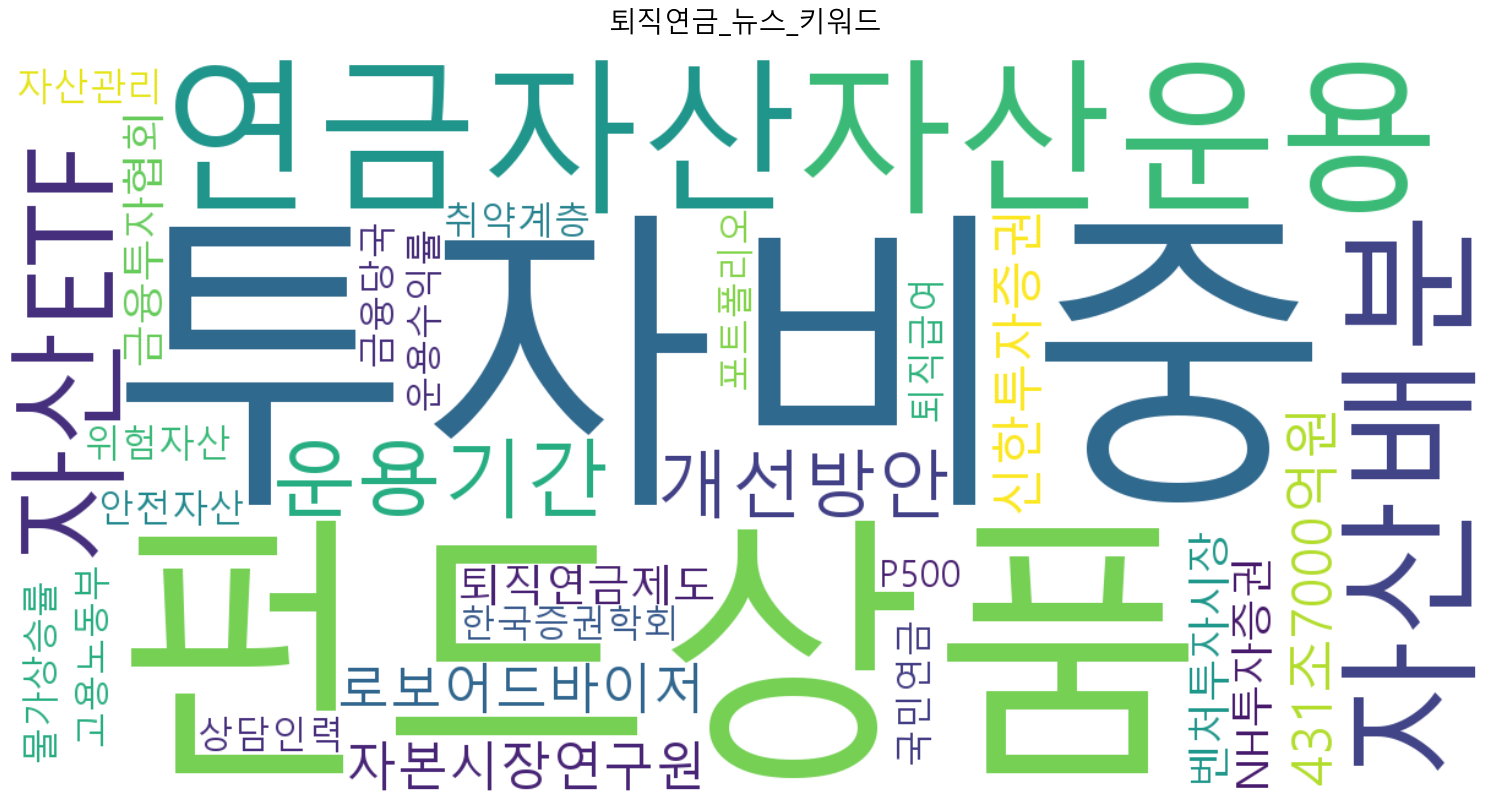

✅ 워드클라우드 저장: 퇴직연금_뉴스_키워드.png

✅ 분석 결과 저장: news_keyword_results_202506241134.xlsx


In [32]:
import pandas as pd
import re
import os
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from soynlp.noun import LRNounExtractor_v2
from soynlp.word import WordExtractor

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 불용어 리스트
STOP_WORDS = {
    '있는', '없는', '그', '이', '저', '것', '수', '등', '및', '또한', 
    '대한', '위해', '통해', '기자', '연합뉴스', '뉴스', '기사', '출처',
    '이번', '최근', '지난해', '올해', '때문', '대표', '관련', '대비',
    '가장', '다양한', '다른', '자신', '우리', '여러', '모든', '각각',
    '퇴직연금', '퇴직', '연금'
}

# CSV 파일 읽기 함수
def load_csv_data(file_path):
    # 파일 존재 여부 확인
    if not os.path.exists(file_path):
        print(f"❌ 파일을 찾을 수 없습니다: {file_path}")
        print("⚠️ 현재 작업 디렉토리 파일 목록:")
        print(os.listdir())
        return None
    
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"✅ CSV 파일 로드 완료: {len(df)}개 행")
        return df
    except Exception as e:
        print(f"❌ CSV 파일 로드 실패: {e}")
        return None

# 텍스트 전처리 함수
def preprocess_text(text):
    if pd.isna(text) or text == "":
        return ""
    text = re.sub(r'[^\w\s가-힣]', ' ', str(text))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 한국어 키워드 추출 함수 (수정된 버전)
def extract_korean_keywords(texts, top_n=30):
    # 1. 명사 추출
    noun_extractor = LRNounExtractor_v2()
    nouns = noun_extractor.train_extract(texts)
    
    # 2. 단어 추출 (verbose 인자 제거)
    word_extractor = WordExtractor(min_frequency=2)
    word_extractor.train(texts)
    words = word_extractor.extract()
    
    # 3. 명사와 단어 통합
    word_scores = {}
    for word, score in nouns.items():
        word_scores[word] = score.score * 10
        
    for word, score in words.items():
        if word not in word_scores:
            word_scores[word] = score.cohesion_forward * 5
    
    # 4. 불용어 제거 및 필터링
    filtered_scores = {
        word: score for word, score in word_scores.items() 
        if len(word) > 1 and word not in STOP_WORDS
    }
    
    # 5. 상위 키워드 추출
    sorted_words = sorted(filtered_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]

# 워드클라우드 생성 함수
def create_wordcloud(word_freq, title="키워드 워드클라우드"):
    if not word_freq:
        print("❌ 키워드 데이터가 없습니다.")
        return
        
    wordcloud = WordCloud(
        font_path='malgun.ttf',
        width=1200,
        height=600,
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate_from_frequencies(dict(word_freq))
    
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, pad=20)
    plt.tight_layout()
    
    filename = f"{title.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ 워드클라우드 저장: {filename}")

# 메인 분석 함수
def analyze_news_keywords(csv_file_path):
    print("🔍 뉴스 키워드 분석 시작...")
    
    # 1. CSV 파일 로드
    df = load_csv_data(csv_file_path)
    if df is None:
        return
    
    # 2. 컬럼 확인
    if '제목' not in df.columns:
        print("❌ '제목' 컬럼을 찾을 수 없습니다.")
        print(f"사용 가능한 컬럼: {list(df.columns)}")
        return
    
    # 3. 제목 데이터 전처리
    print("📝 제목 데이터 전처리 중...")
    df['제목_전처리'] = df['제목'].apply(preprocess_text)
    titles = df[df['제목_전처리'] != '']['제목_전처리'].tolist()
    
    if not titles:
        print("❌ 분석할 제목이 없습니다.")
        return
    
    # 4. 키워드 추출
    print("🔤 한국어 키워드 추출 중...")
    keywords = extract_korean_keywords(titles)
    
    # 5. 결과 출력
    print("\n📊 === 상위 30개 키워드 ===")
    for i, (word, score) in enumerate(keywords, 1):
        print(f"{i:2d}. {word:<10} : {score:.2f}")
    
    # 6. 워드클라우드 생성
    word_freq = [(word, int(score * 100)) for word, score in keywords]
    create_wordcloud(word_freq, "퇴직연금_뉴스_키워드")
    
    # 7. 결과 저장
    results_df = pd.DataFrame(keywords, columns=['키워드', '점수'])
    results_filename = f"news_keyword_results_{pd.Timestamp.now().strftime('%Y%m%d%H%M')}.xlsx"
    results_df.to_excel(results_filename, index=False)
    print(f"\n✅ 분석 결과 저장: {results_filename}")
    
    return results_df

# 실행
if __name__ == "__main__":
    # 파일 경로 확인
    csv_file = "retirement_pension_news.csv"
    print(f"📂 분석할 파일: {csv_file}")
    
    # 현재 디렉토리 확인
    print(f"📁 현재 작업 디렉토리: {os.getcwd()}")
    
    # 분석 실행
    analyze_news_keywords(csv_file)
